In [1]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd() )
print("mp", module_path)
# in standard python
#module_path = str(Path.cwd(__file__).parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)


#import requests
#from pyaxis import pyaxis
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import mercury as mr
import data_helpers as dh
import plot_helpers as ph


app = mr.App(title="Lønforhold",
        description="",
        show_code=False,
        show_prompt=False,
        continuous_update=True,
        static_notebook=False,
        show_sidebar=True,
        full_screen=False,
        allow_download=True)

api = "https://statbank.hagstova.fo:443/api/v1/fo/H2/IP/IP01/innt_nbs.px"

style.use(f"file:plot.mplstyle")

mp d:\dev\hagstova\git\hagtol\fo_area_hagtol


mercury.App

In [2]:


json_body_salary = {
  "query": [
    {
      "code": "unit",
      "selection": {
        "filter": "item",
        "values": [
          "DKK"
        ]
      }
    },
    {
      "code": "sex",
      "selection": {
        "filter": "item",
        "values": [
          "TOT",
#          "M",
#          "F"
        ]
      }
    },
    {
      "code": "measure",
      "selection": {
        "filter": "item",
        "values": [
          "BR",
          "NE"
        ]
      }
    },
    {
      "code": "region",
      "selection": {
        "filter": "item",
        "values": [
          "9999",
          "4100",
          "4200",
          "4300",
          "4700",
          "4400",
          "4500",
          "4600"
        ]
      }
    },
    {
      "code": "age",
      "selection": {
        "filter": "item",
        "values": [
          "Y_GE15"
          
        ]
      }
    },
    {
      "code": "year",
      "selection": {
        "filter": "item",
        "values": [
          "2021",
          "2020",
          "2019",
          "2018",
          "2017",
          "2016",
          "2015",
          "2014",
          "2013",
          "2012",
          "2011",
          "2010",
          "2009",
#          "2015",
#          "2010"
        ]
      }
    },
    {
      "code": "percentile intervals",
      "selection": {
        "filter": "item",
        "values": [
          "P1_AVG",
          "P10_AVG",
          "P25_AVG",
          "P50_AVG",
          "P75_AVG",
          "P90_AVG",
#          "P95_AVG",
#          "P99_AVG",
          "P100_AVG"
        ]
      }
    }
  ],
  "response": {
    "format": "px"
  }
}



In [3]:
regions = dh.get_regions()

region = mr.Select(value="suduroy", choices=regions, label="Øki")

mercury.Select

In [4]:
municipality = mr.Select(choices= dh.get_municipalities(region.value), label="Kommuna")

mercury.Select

In [5]:
filter, value = dh.get_filter(region.value, municipality.value)
#print(filter, value)
#json_body_salary["query"][0]["selection"]["filter"] = filter
#json_body_salary["query"][0]["selection"]["values"] = [value]
#print("fv", filter, value, json_body)
df = dh.fetch_data("v1/fo/H2/IP/IP01/innt_nbs.px", json_body_salary, f"salery-data-{region.value}-{municipality.value}")
#df['date']=pd.to_datetime(df['month']+df['year'].astype(str),format='%b%Y')
df['value']=pd.to_numeric(df['DATA'])


load px_cache/salery-data-suduroy-Øll.px


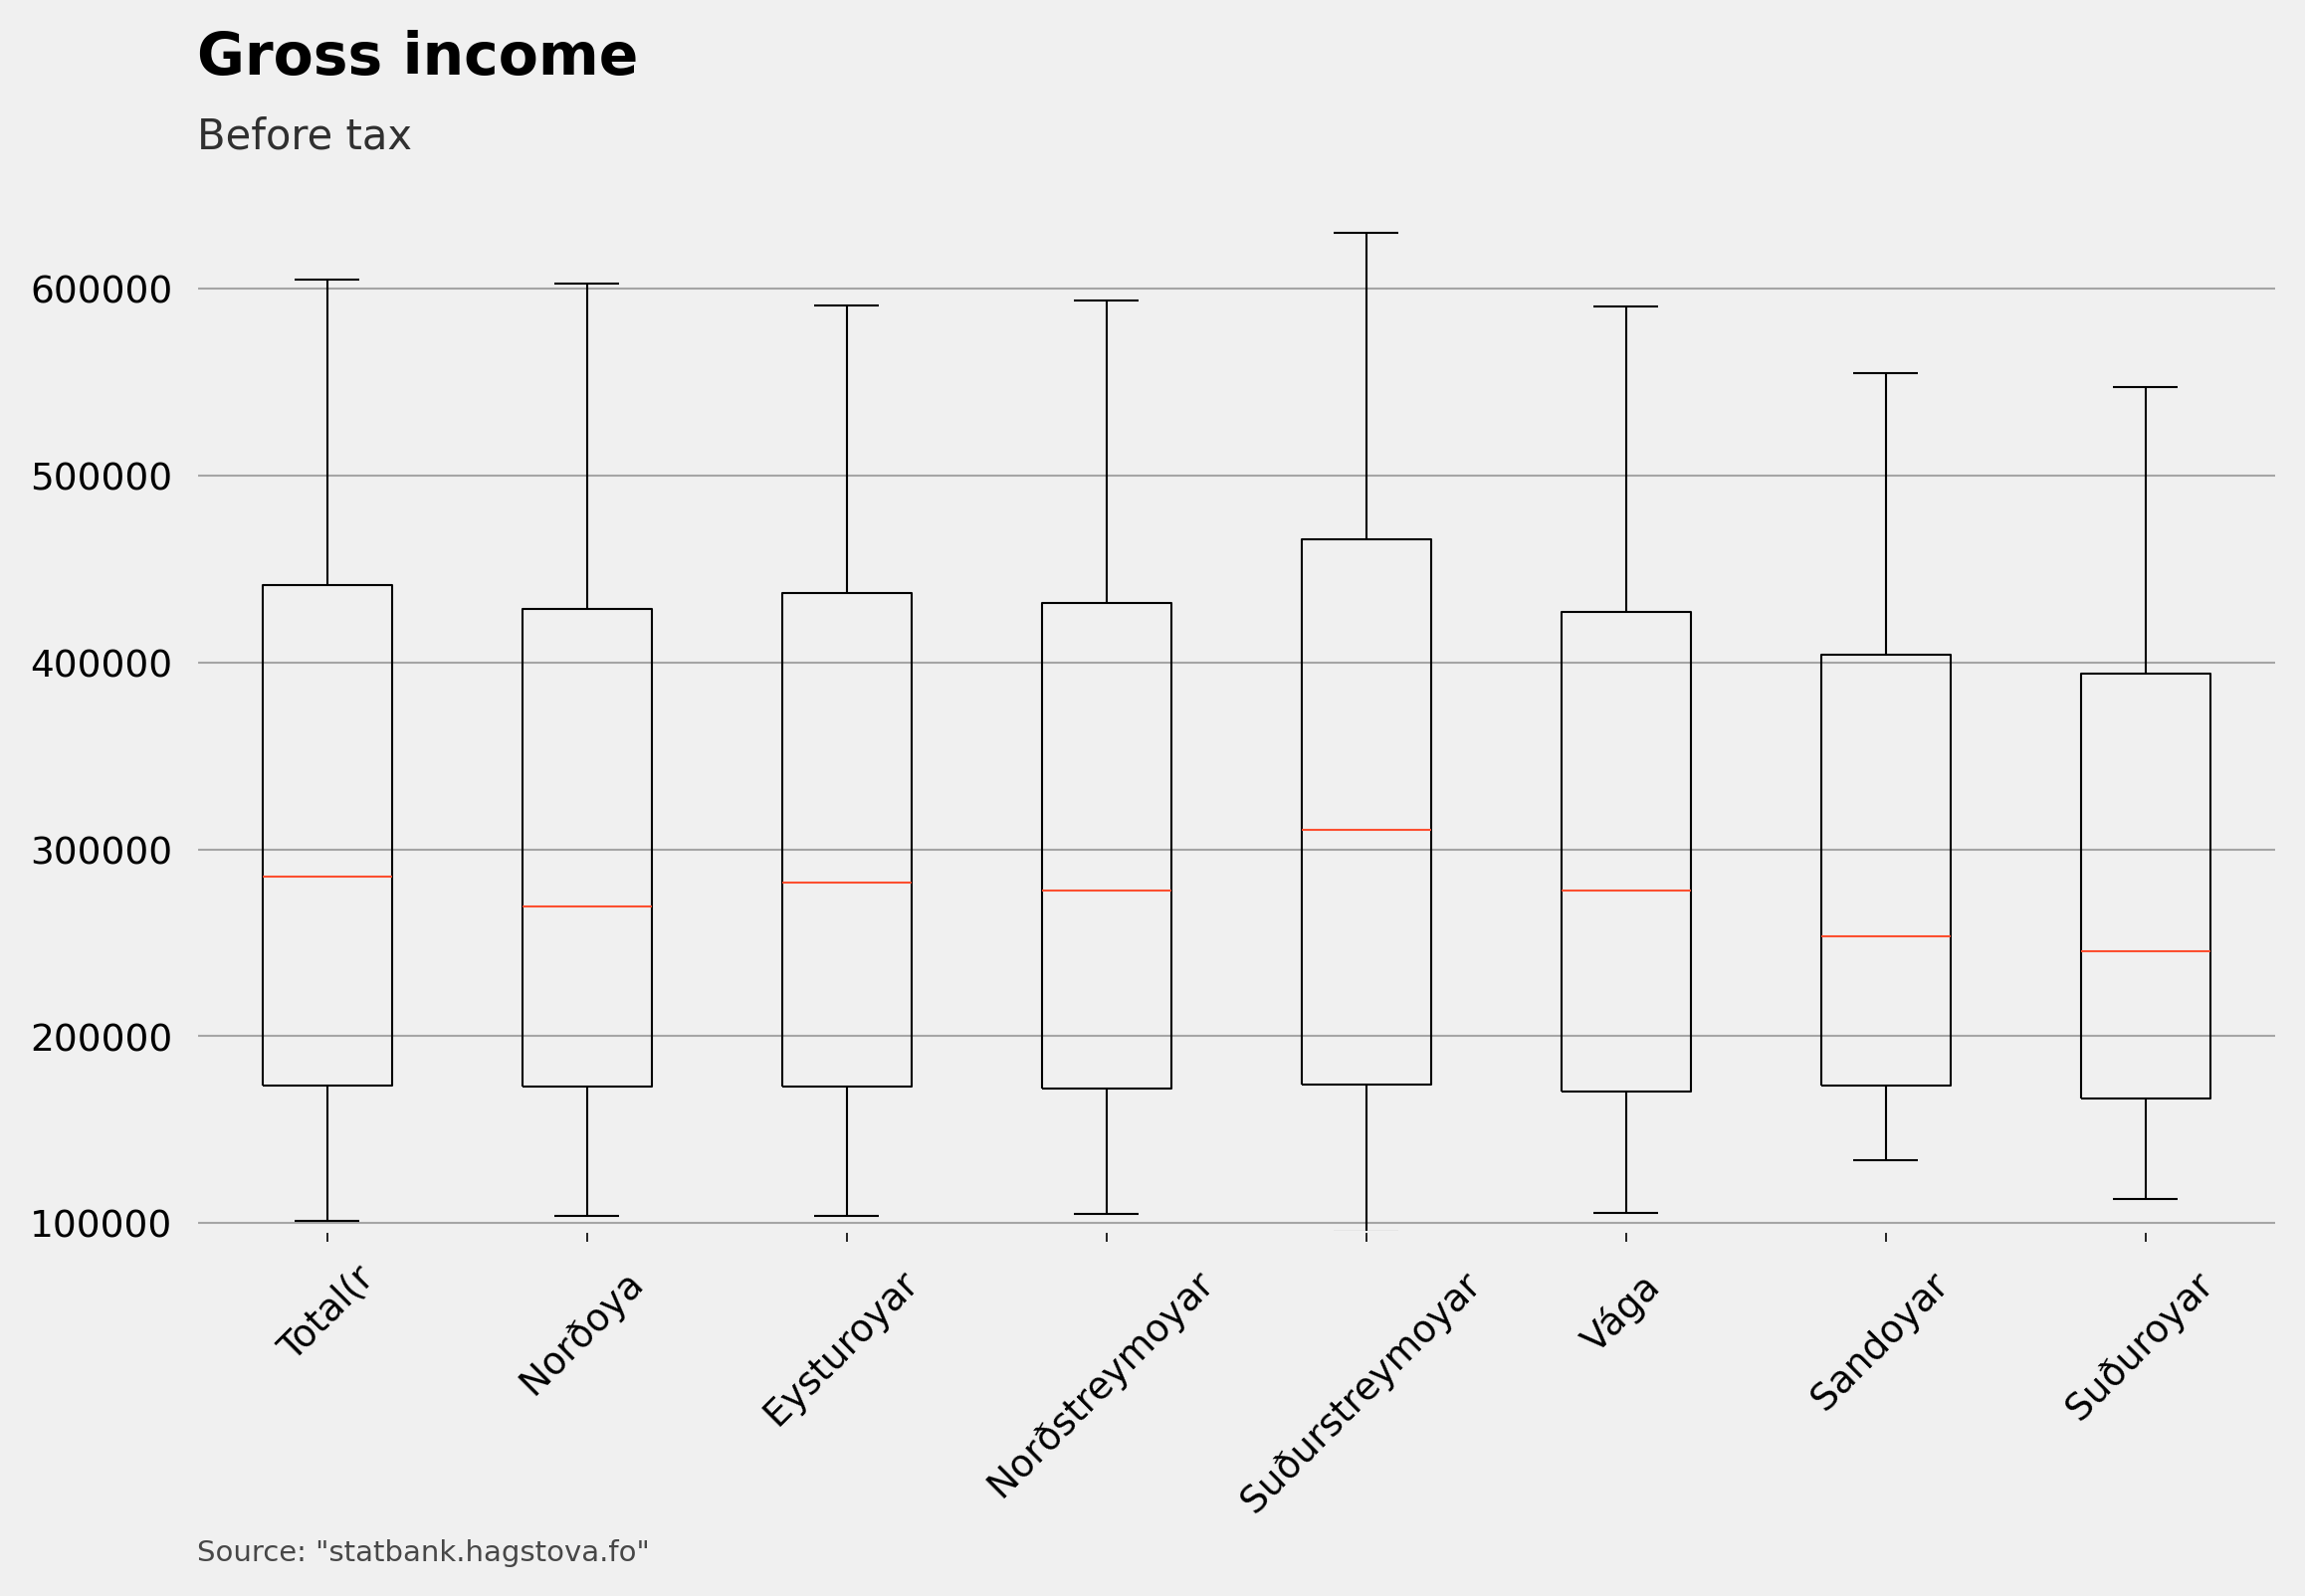

In [16]:


def calc_box(measure, year):
    sdf = pd.DataFrame()

    
    sdf['year'] = df['year'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "1" )].reset_index()['year']
    sdf['region'] = df['region'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "1" )].reset_index()['region']
    #sdf['1'] =  df['value'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "1" )].reset_index()['value']
    sdf['10'] = df['value'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "10" )].reset_index()['value']
    sdf['25'] = df['value'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "25" )].reset_index()['value']
    sdf['50'] = df['value'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "50" )].reset_index()['value']
    sdf['75'] = df['value'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "75" )].reset_index()['value']
    sdf['90'] = df['value'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "90" )].reset_index()['value']
    #sdf['100'] = df['value'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(fdf["percentile intervals"] == "100" )].reset_index()['value']
    #print(sdf)



    gk = sdf.groupby("year")
    g = gk.get_group(year)
    bxf = pd.DataFrame()
    bxf["label"] = g["region"]
    bxf["median"] =  g['50']
    bxf["mean"] =  g['50']
    bxf[10] = g['10']
    bxf[25] = g['25']
    bxf[50] =  g['50']
    bxf[75] = g['75']
    bxf[90] = g['90']

    box_data = []
    for row in bxf.iterrows():
        #x = row[1]["label"]
        box_data.append([
            row[1]["label"][:-6],
            row[1][10],
            row[1][25],
            row[1][50],
            row[1][75],
            row[1][90],
            None
        ])

    return box_data

gross_box = calc_box("Gross income", "2021") 
ph.box_plot_2(gross_box, "Gross income", "Before tax")
plt.show()




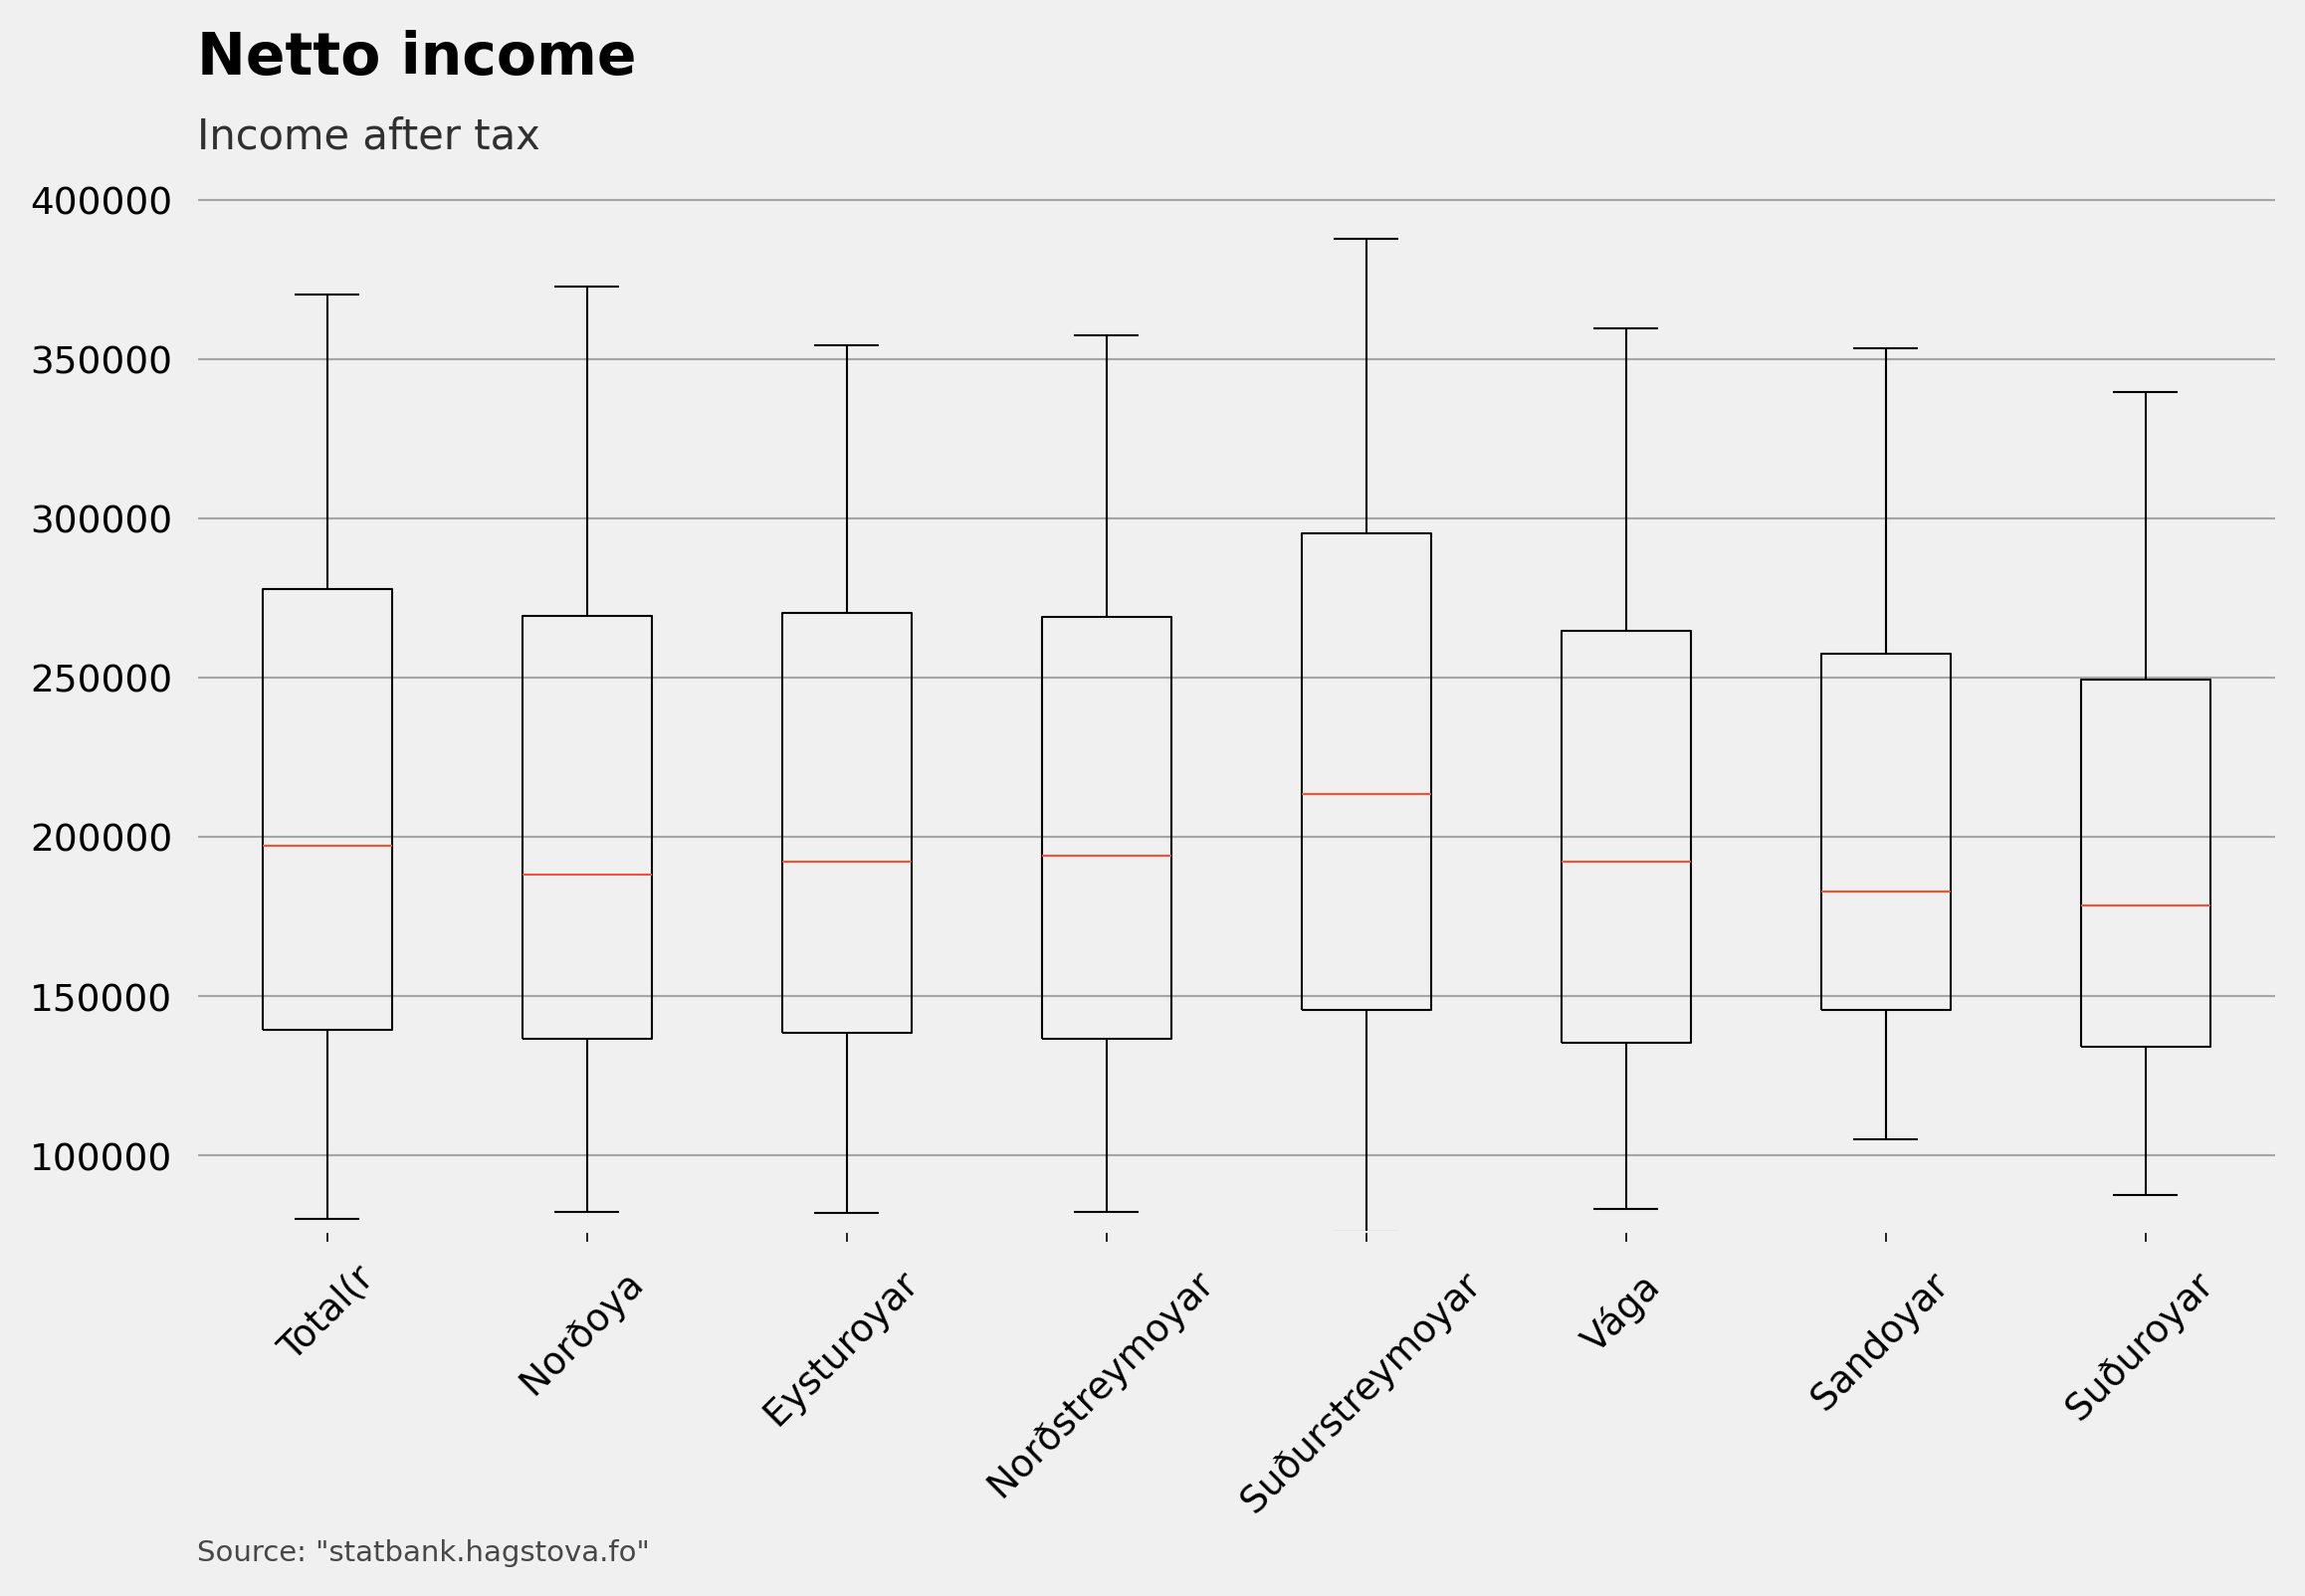

In [8]:
gross_box = calc_box("Net income", "2021") 
ph.box_plot_2(gross_box, "Netto income", "Income after tax")
plt.show()

<AxesSubplot:xlabel='year'>

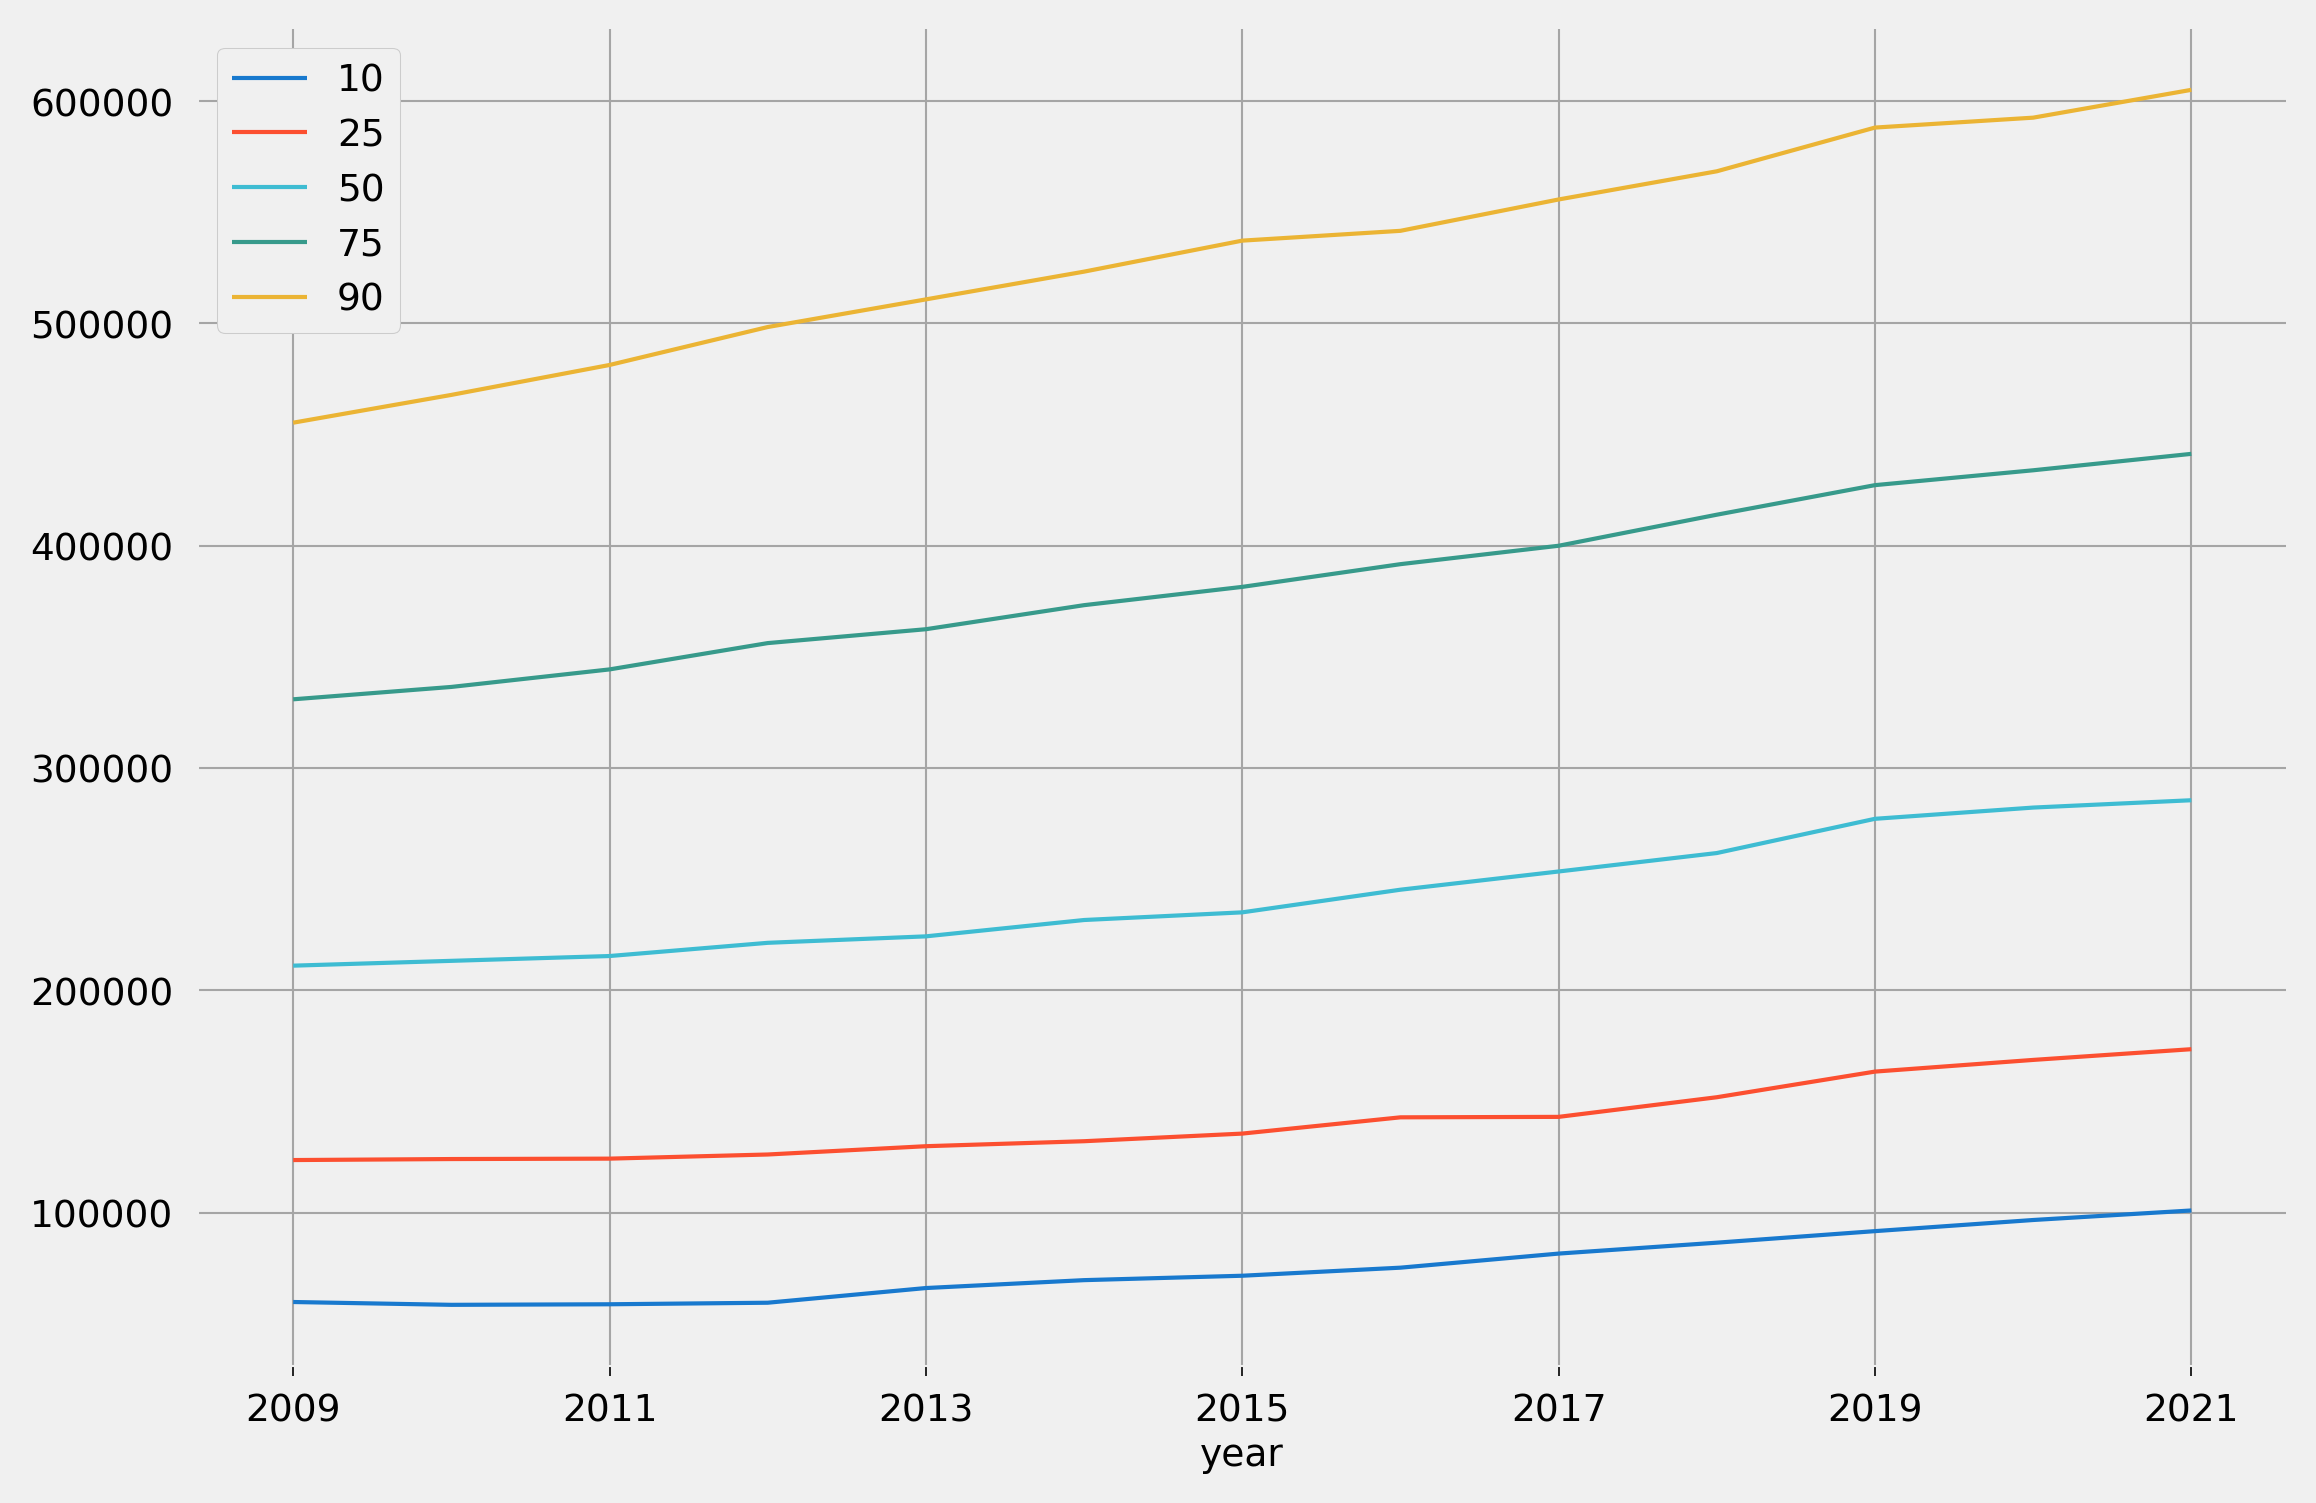

In [34]:
#print(df)

sdf = pd.DataFrame()
measure = "Gross income"
region = "Total(region)"
sdf['year'] = df['year'].loc[(df["region"] == region) & (df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "1" )].reset_index()['year']
sdf['region'] = df['region'].loc[(df["region"] == region) & (df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "1" )].reset_index()['region']
#sdf['1'] =  df['value'].loc[(df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "1" )].reset_index()['value']
sdf['10'] = df['value'].loc[(df["region"] == region) & (df["sex"] == "Total (sex)") & (df["percentile intervals"] == "10" )].reset_index()['value']
sdf['25'] = df['value'].loc[(df["region"] == region) & (df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "25" )].reset_index()['value']
sdf['50'] = df['value'].loc[(df["region"] == region) & (df["region"] == region) & (df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "50" )].reset_index()['value']
sdf['75'] = df['value'].loc[(df["region"] == region) & (df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "75" )].reset_index()['value']
sdf['90'] = df['value'].loc[(df["region"] == region) & (df["measure"] == measure ) & (df["sex"] == "Total (sex)") &(df["percentile intervals"] == "90" )].reset_index()['value']
sdf = sdf.set_index('year')

#print(sdf.head())
sdf.plot()
